In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

### Importing the dataset and its labels

In [27]:
labels = pd.read_csv('../../Data/Patient class labels.csv')
labels

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1
...,...,...,...,...,...
917,Breast_MRI_918,1,1,0,0
918,Breast_MRI_919,1,1,0,0
919,Breast_MRI_920,1,1,0,0
920,Breast_MRI_921,1,1,0,0


In [58]:
filename1 = "pyradiomics_extraction_box_with_correct_mask.csv"
filename2 = "pyradiomics_extraction_box_without_correct_mask.csv"
filename3 = "pyradiomics_extraction_segmentation_maskcorrect.csv"
filename4 = "pyradiomics_extraction_segmentation_no_maskcorrect.csv"

FILE_PATH = "../../Data/" + filename1
features = pd.read_csv(FILE_PATH)
# other_features = pd.read_csv('../../Data/Preprocessed_Clinical_Features.csv')
features

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,Breast_MRI_001,post_1,0.807005,0.729780,23.614309,32.358102,36.073737,38.431136,39.309346,45.798426,...,5.741796e-01,5.741796e-01,2.136700e+00,0.003961,4.009263e+06,0.0,1000000.0,0.0,0.0,0.0
1,Breast_MRI_002,post_1,0.641558,0.577887,17.378564,30.072592,23.148662,29.852205,29.748492,33.784677,...,6.011205e-01,6.011205e-01,1.823026e+00,0.001401,6.054147e+06,0.0,1000000.0,0.0,0.0,0.0
2,Breast_MRI_003,post_1,0.756223,0.272616,13.050754,47.872295,40.488107,43.126056,56.606869,57.665740,...,5.064866e-01,5.064866e-01,2.281373e+00,0.001484,1.663605e+07,0.0,1000000.0,0.0,0.0,0.0
3,Breast_MRI_004,post_1,0.718139,0.610317,8.730117,14.304230,11.420813,14.972284,14.477716,16.540987,...,3.501278e-07,3.501278e-07,-3.203427e-16,0.000592,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
4,Breast_MRI_005,post_1,0.687760,0.436019,22.539193,51.693090,55.175581,49.674566,36.443449,58.274413,...,5.000000e-01,5.000000e-01,1.000000e+00,0.000047,4.436710e+08,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,post_1,0.886914,0.668151,28.553043,42.734408,45.886501,41.977361,51.383808,56.016573,...,3.266470e-10,3.266470e-10,-3.203427e-16,0.000018,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
918,Breast_MRI_919,post_1,0.757419,0.596730,12.864613,21.558522,21.066007,20.543932,25.375225,27.268354,...,4.503200e-01,4.503200e-01,1.921928e+00,0.000938,4.485585e+06,0.0,1000000.0,0.0,0.0,0.0
919,Breast_MRI_920,post_1,0.872632,0.837806,15.199560,18.142097,19.038279,20.649190,20.505122,24.348411,...,4.626802e-08,4.626802e-08,-3.203427e-16,0.000215,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
920,Breast_MRI_921,post_1,0.855874,0.735409,30.453436,41.410193,43.076382,45.448460,48.143552,54.398662,...,4.008642e-01,4.008642e-01,2.197160e+00,0.000230,1.504081e+08,0.0,1000000.0,0.0,0.0,0.0


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Columns: 109 entries, patient to original_ngtdm_Strength
dtypes: float64(107), object(2)
memory usage: 785.3+ KB


### Merging the two dataframes

In [59]:
# Merging the two dataframes on patient id
total_features = pd.merge(features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')
total_features.drop(columns = ['sequence', 'patient'], inplace = True)
total_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,36.073737,38.431136,39.309346,45.798426,11352.720347,26.113156,...,4.009263e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,23.148662,29.852205,29.748492,33.784677,4051.005400,19.293327,...,6.054147e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,40.488107,43.126056,56.606869,57.665740,11866.396187,36.202150,...,1.663605e+07,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,11.420813,14.972284,14.477716,16.540987,829.333325,10.272429,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,55.175581,49.674566,36.443449,58.274413,25572.814941,35.552459,...,4.436710e+08,0.0,1000000.0,0.0,0.0,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.886914,0.668151,28.553043,42.734408,45.886501,41.977361,51.383808,56.016573,28567.316541,37.901723,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
918,0.757419,0.596730,12.864613,21.558522,21.066007,20.543932,25.375225,27.268354,2558.161146,16.328835,...,4.485585e+06,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
919,0.872632,0.837806,15.199560,18.142097,19.038279,20.649190,20.505122,24.348411,2671.696974,15.831368,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
920,0.855874,0.735409,30.453436,41.410193,43.076382,45.448460,48.143552,54.398662,28568.303573,35.441921,...,1.504081e+08,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0


## Data Processing, Visualisation and Feature Selection

### Checking and removing outliers

#### Z-Score

In [60]:
# Removing outliers using Z-score from the total_features dataframe
from scipy import stats
z = np.abs(stats.zscore(total_features))
print(np.where(z > 3))
z_features = total_features[(z < 3).all(axis=1)]
z_features


(array([  7,   7,   7,   7,  11,  11,  11,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  15,  15,  23,  23,  23,  23,  23,  23,
        23,  23,  23,  27,  27,  27,  27,  27,  28,  45,  45,  45,  45,
        49,  50,  56,  56,  56,  56,  60,  60,  62,  62,  62,  62,  62,
        62,  62,  62,  62,  62,  62,  62,  62,  64,  64,  64,  64,  82,
        82,  85,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,
        89,  89, 106, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107,
       107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107,
       107, 107, 107, 107, 117, 118, 118, 118, 118, 143, 143, 148, 148,
       148, 148, 148, 148, 149, 149, 149, 150, 150, 167, 180, 180, 180,
       180, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 185,
       196, 196, 196, 196, 196, 201, 201, 209, 209, 209, 209, 209, 209,
       209, 212, 216, 216, 218, 233, 233, 233, 233, 233, 233, 233, 233,
       233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 2

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,36.073737,38.431136,39.309346,45.798426,11352.720347,26.113156,...,4.009263e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,23.148662,29.852205,29.748492,33.784677,4051.005400,19.293327,...,6.054147e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,40.488107,43.126056,56.606869,57.665740,11866.396187,36.202150,...,1.663605e+07,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,11.420813,14.972284,14.477716,16.540987,829.333325,10.272429,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,55.175581,49.674566,36.443449,58.274413,25572.814941,35.552459,...,4.436710e+08,0.0,1000000.0,0.0,0.0,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.975963,0.774499,68.771301,88.794509,114.415161,112.638536,102.065813,125.770251,211743.196733,86.660192,...,2.663537e+08,0.0,1000000.0,0.0,0.0,0.0,0,0,0,3
918,0.757419,0.596730,12.864613,21.558522,21.066007,20.543932,25.375225,27.268354,2558.161146,16.328835,...,4.485585e+06,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
919,0.872632,0.837806,15.199560,18.142097,19.038279,20.649190,20.505122,24.348411,2671.696974,15.831368,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
920,0.855874,0.735409,30.453436,41.410193,43.076382,45.448460,48.143552,54.398662,28568.303573,35.441921,...,1.504081e+08,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0


### Feature Engineering

In [61]:
clean_df = z_features
clean_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,36.073737,38.431136,39.309346,45.798426,11352.720347,26.113156,...,4.009263e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,23.148662,29.852205,29.748492,33.784677,4051.005400,19.293327,...,6.054147e+06,0.0,1000000.0,0.0,0.0,0.0,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,40.488107,43.126056,56.606869,57.665740,11866.396187,36.202150,...,1.663605e+07,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,11.420813,14.972284,14.477716,16.540987,829.333325,10.272429,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,55.175581,49.674566,36.443449,58.274413,25572.814941,35.552459,...,4.436710e+08,0.0,1000000.0,0.0,0.0,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.975963,0.774499,68.771301,88.794509,114.415161,112.638536,102.065813,125.770251,211743.196733,86.660192,...,2.663537e+08,0.0,1000000.0,0.0,0.0,0.0,0,0,0,3
918,0.757419,0.596730,12.864613,21.558522,21.066007,20.543932,25.375225,27.268354,2558.161146,16.328835,...,4.485585e+06,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
919,0.872632,0.837806,15.199560,18.142097,19.038279,20.649190,20.505122,24.348411,2671.696974,15.831368,...,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0
920,0.855874,0.735409,30.453436,41.410193,43.076382,45.448460,48.143552,54.398662,28568.303573,35.441921,...,1.504081e+08,0.0,1000000.0,0.0,0.0,0.0,1,1,0,0


#### Automated Feature Selection

In [62]:
# Performing automated feature selection using XGBoost
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
X = clean_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype'])
y = clean_df['ER']
model = XGBClassifier()
model.fit(X, y)
# print(model.feature_importances_)

selection = SelectFromModel(model, threshold=0.01, prefit=True)
clf = selection.transform(X)
selected_features_XGBoost = pd.DataFrame(clf)
selected_features_XGBoost.columns = X.columns[selection.get_support()]
print("Dropped Features - ")
print(X.columns[~selection.get_support()])

selected_features_XGBoost['ER'] = [i for i in clean_df['ER']]
selected_features_XGBoost['PR'] = [i for i in clean_df['PR']]
selected_features_XGBoost['HER2'] = [i for i in clean_df['HER2']]
selected_features_XGBoost['Mol Subtype'] = [i for i in clean_df['Mol Subtype']]
selected_features_XGBoost

Dropped Features - 
Index(['original_shape_Maximum2DDiameterColumn',
       'original_shape_MinorAxisLength', 'original_firstorder_Entropy',
       'original_firstorder_Uniformity', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance',
       'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn',
       'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_Imc2',
       'original_glcm_InverseVariance', 'original_glcm_JointAverage',
       'original_glcm_JointEnergy', 'original_glcm_JointEntropy',
       'original_glcm_MCC', 'original_glcm_MaximumProbability',
       'original_glcm_SumAverage', 'original_glcm_SumEntropy',
       'original_glcm_SumSquares', 'original_gldm_GrayLevelVariance',
       'original_gldm_H

c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,38.431136,39.309346,45.798426,11352.720347,0.324793,7521.031831,...,21.338462,0.328284,5.741796e-01,2.136700e+00,0.003961,4.009263e+06,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,29.852205,29.748492,33.784677,4051.005400,0.339407,3620.810121,...,4.692308,0.360947,6.011205e-01,1.823026e+00,0.001401,6.054147e+06,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,43.126056,56.606869,57.665740,11866.396187,0.250417,10046.935178,...,10.473684,0.275623,5.064866e-01,2.281373e+00,0.001484,1.663605e+07,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,14.972284,14.477716,16.540987,829.333325,0.765256,557.823411,...,1.000000,1.000000,3.501278e-07,-3.203427e-16,0.000592,0.000000e+00,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,49.674566,36.443449,58.274413,25572.814941,0.451479,9297.483821,...,1.000000,0.500000,5.000000e-01,1.000000e+00,0.000047,4.436710e+08,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.975963,0.774499,68.771301,88.794509,112.638536,102.065813,125.770251,211743.196733,0.122433,140321.670242,...,161.066318,0.281093,5.418627e-01,2.603101e+00,0.001457,2.663537e+08,0,0,0,3
773,0.757419,0.596730,12.864613,21.558522,20.543932,25.375225,27.268354,2558.161146,0.480862,1881.115651,...,1.400000,0.280000,4.503200e-01,1.921928e+00,0.000938,4.485585e+06,1,1,0,0
774,0.872632,0.837806,15.199560,18.142097,20.649190,20.505122,24.348411,2671.696974,0.556035,1674.583798,...,1.000000,1.000000,4.626802e-08,-3.203427e-16,0.000215,0.000000e+00,1,1,0,0
775,0.855874,0.735409,30.453436,41.410193,45.448460,48.143552,54.398662,28568.303573,0.615378,7343.981946,...,2.111111,0.234568,4.008642e-01,2.197160e+00,0.000230,1.504081e+08,1,1,0,0


### Feature Scaling

In [63]:
engineered_features = selected_features_XGBoost
engineered_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,38.431136,39.309346,45.798426,11352.720347,0.324793,7521.031831,...,21.338462,0.328284,5.741796e-01,2.136700e+00,0.003961,4.009263e+06,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,29.852205,29.748492,33.784677,4051.005400,0.339407,3620.810121,...,4.692308,0.360947,6.011205e-01,1.823026e+00,0.001401,6.054147e+06,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,43.126056,56.606869,57.665740,11866.396187,0.250417,10046.935178,...,10.473684,0.275623,5.064866e-01,2.281373e+00,0.001484,1.663605e+07,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,14.972284,14.477716,16.540987,829.333325,0.765256,557.823411,...,1.000000,1.000000,3.501278e-07,-3.203427e-16,0.000592,0.000000e+00,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,49.674566,36.443449,58.274413,25572.814941,0.451479,9297.483821,...,1.000000,0.500000,5.000000e-01,1.000000e+00,0.000047,4.436710e+08,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.975963,0.774499,68.771301,88.794509,112.638536,102.065813,125.770251,211743.196733,0.122433,140321.670242,...,161.066318,0.281093,5.418627e-01,2.603101e+00,0.001457,2.663537e+08,0,0,0,3
773,0.757419,0.596730,12.864613,21.558522,20.543932,25.375225,27.268354,2558.161146,0.480862,1881.115651,...,1.400000,0.280000,4.503200e-01,1.921928e+00,0.000938,4.485585e+06,1,1,0,0
774,0.872632,0.837806,15.199560,18.142097,20.649190,20.505122,24.348411,2671.696974,0.556035,1674.583798,...,1.000000,1.000000,4.626802e-08,-3.203427e-16,0.000215,0.000000e+00,1,1,0,0
775,0.855874,0.735409,30.453436,41.410193,45.448460,48.143552,54.398662,28568.303573,0.615378,7343.981946,...,2.111111,0.234568,4.008642e-01,2.197160e+00,0.000230,1.504081e+08,1,1,0,0


In [64]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = engineered_features.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype'])
scaled_features = scaler.fit_transform(X)
scaled_features = pd.DataFrame(scaled_features)

scaled_features.columns = X.columns
scaled_features['ER'] = [i for i in engineered_features['ER']]
scaled_features['PR'] = [i for i in engineered_features['PR']]
scaled_features['HER2'] = [i for i in engineered_features['HER2']]
scaled_features['Mol Subtype'] = [i for i in engineered_features['Mol Subtype']]
scaled_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,ER,PR,HER2,Mol Subtype
0,0.030271,0.610420,0.133286,-0.191054,0.014306,-0.040978,0.002282,-0.293777,-0.551061,-0.235833,...,0.371389,-0.602588,0.842883,0.694778,2.320683,-0.312360,0,0,1,2
1,-1.296841,-0.376208,-0.414414,-0.313791,-0.403504,-0.510730,-0.515526,-0.525513,-0.468179,-0.429865,...,-0.261415,-0.494865,0.948987,0.378456,0.304492,-0.305858,0,0,0,3
2,-0.377069,-2.359105,-0.794535,0.642091,0.242958,0.808898,0.513778,-0.277475,-0.972892,-0.110172,...,-0.041636,-0.776266,0.576281,0.840673,0.369128,-0.272212,1,1,0,0
3,-0.682557,-0.165557,-1.174026,-1.160585,-1.128185,-1.261026,-1.258751,-0.627760,1.947055,-0.582246,...,-0.401778,1.612769,-1.418462,-1.459966,-0.333484,-0.325108,1,1,0,0
4,-0.926238,-1.297713,0.038856,0.847276,0.561883,-0.181788,0.540013,0.157529,0.167448,-0.147456,...,-0.401778,-0.036259,0.550734,-0.451521,-0.762275,1.085564,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1.385551,0.900894,4.099526,2.839700,3.628349,3.042424,3.449170,6.066057,-1.698759,6.370869,...,5.683152,-0.758227,0.715606,1.165118,0.348495,0.521776,0,0,0,3
773,-0.367479,-0.253814,-0.810884,-0.771014,-0.856835,-0.725601,-0.796388,-0.572892,0.334095,-0.516413,...,-0.386572,-0.761832,0.355075,0.478192,-0.060729,-0.310845,1,1,0,0
774,0.556686,1.312104,-0.605800,-0.954483,-0.851709,-0.964883,-0.922241,-0.569289,0.760443,-0.526688,...,-0.401778,1.612769,-1.418464,-1.459966,-0.630207,-0.325108,1,1,0,0
775,0.422269,0.646981,0.733982,0.295062,0.356063,0.393071,0.372963,0.252597,1.097013,-0.244641,...,-0.359539,-0.911669,0.160298,0.755748,-0.618095,0.153122,1,1,0,0


### Checking and handling class imbalance

In [65]:
preprocessed_features = scaled_features
preprocessed_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_Sphericity,original_shape_SurfaceArea,...,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,ER,PR,HER2,Mol Subtype
0,0.030271,0.610420,0.133286,-0.191054,0.014306,-0.040978,0.002282,-0.293777,-0.551061,-0.235833,...,0.371389,-0.602588,0.842883,0.694778,2.320683,-0.312360,0,0,1,2
1,-1.296841,-0.376208,-0.414414,-0.313791,-0.403504,-0.510730,-0.515526,-0.525513,-0.468179,-0.429865,...,-0.261415,-0.494865,0.948987,0.378456,0.304492,-0.305858,0,0,0,3
2,-0.377069,-2.359105,-0.794535,0.642091,0.242958,0.808898,0.513778,-0.277475,-0.972892,-0.110172,...,-0.041636,-0.776266,0.576281,0.840673,0.369128,-0.272212,1,1,0,0
3,-0.682557,-0.165557,-1.174026,-1.160585,-1.128185,-1.261026,-1.258751,-0.627760,1.947055,-0.582246,...,-0.401778,1.612769,-1.418462,-1.459966,-0.333484,-0.325108,1,1,0,0
4,-0.926238,-1.297713,0.038856,0.847276,0.561883,-0.181788,0.540013,0.157529,0.167448,-0.147456,...,-0.401778,-0.036259,0.550734,-0.451521,-0.762275,1.085564,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1.385551,0.900894,4.099526,2.839700,3.628349,3.042424,3.449170,6.066057,-1.698759,6.370869,...,5.683152,-0.758227,0.715606,1.165118,0.348495,0.521776,0,0,0,3
773,-0.367479,-0.253814,-0.810884,-0.771014,-0.856835,-0.725601,-0.796388,-0.572892,0.334095,-0.516413,...,-0.386572,-0.761832,0.355075,0.478192,-0.060729,-0.310845,1,1,0,0
774,0.556686,1.312104,-0.605800,-0.954483,-0.851709,-0.964883,-0.922241,-0.569289,0.760443,-0.526688,...,-0.401778,1.612769,-1.418464,-1.459966,-0.630207,-0.325108,1,1,0,0
775,0.422269,0.646981,0.733982,0.295062,0.356063,0.393071,0.372963,0.252597,1.097013,-0.244641,...,-0.359539,-0.911669,0.160298,0.755748,-0.618095,0.153122,1,1,0,0


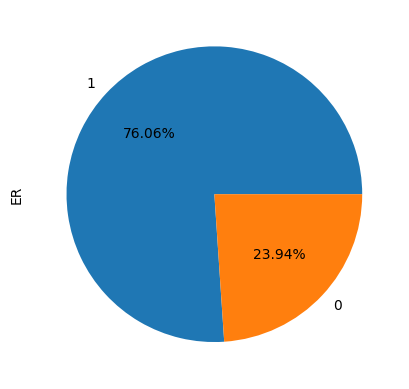

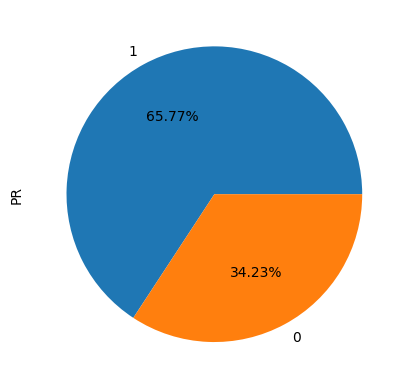

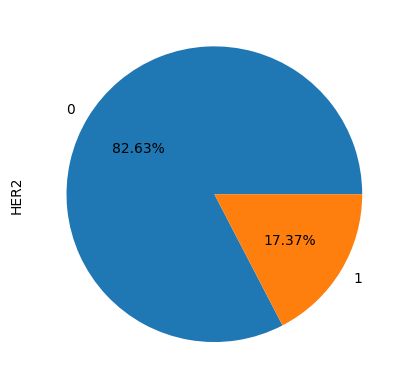

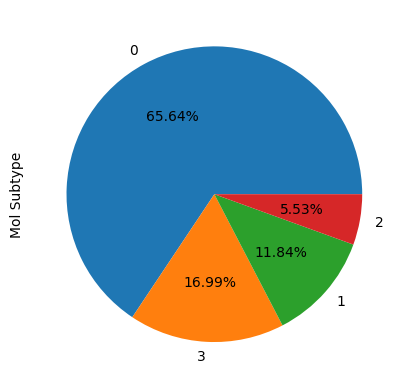

In [54]:
preprocessed_features['ER'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
preprocessed_features['PR'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
preprocessed_features['HER2'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()
preprocessed_features['Mol Subtype'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

##### We can see clearly that there is a class imbalance problem that occurs over here since majority of the data comes from class 0

In [66]:
# Resampling the dataset using SMOTE - Oversampling Technique
from imblearn.over_sampling import SMOTE

def over_sample(preprocessed_df):
    smote = SMOTE()

    x = preprocessed_df.iloc[:, :-1]
    y = preprocessed_df.iloc[:, -1]

    x, y = smote.fit_resample(x, y)
    return x,y

er_df = preprocessed_features.drop(columns = ['PR', 'HER2', 'Mol Subtype'])
pr_df = preprocessed_features.drop(columns = ['ER', 'HER2', 'Mol Subtype'])
her2_df = preprocessed_features.drop(columns = ['ER', 'PR', 'Mol Subtype'])
mol_df = preprocessed_features.drop(columns = ['ER', 'PR', 'HER2'])
x_sampled_er, y_sampled_er = over_sample(er_df)
x_sampled_pr, y_sampled_pr = over_sample(pr_df)
x_sampled_her2, y_sampled_her2 = over_sample(her2_df)
x_sampled_mol, y_sampled_mol = over_sample(mol_df)

# Converting the numpy arrays to dataframes
sampled_er = pd.DataFrame(x_sampled_er)
sampled_er['ER'] = y_sampled_er
sampled_pr = pd.DataFrame(x_sampled_pr)
sampled_pr['PR'] = y_sampled_pr
sampled_her2 = pd.DataFrame(x_sampled_her2)
sampled_her2['HER2'] = y_sampled_her2
sampled_mol = pd.DataFrame(x_sampled_mol)
sampled_mol['Mol Subtype'] = y_sampled_mol

# Printing the shape of the dataframes
print(x_sampled_er.shape)
print(x_sampled_pr.shape)
print(x_sampled_her2.shape)
print(x_sampled_mol.shape)

(1182, 52)
(1022, 52)
(1284, 52)
(2040, 52)


In [69]:
# Saving the preprocessed dataframes to csv files
sampled_er.to_csv('preprocessed_er.csv', index=False)
sampled_pr.to_csv('preprocessed_pr.csv', index=False)
sampled_her2.to_csv('preprocessed_her2.csv', index=False)
sampled_mol.to_csv('preprocessed_mol.csv', index=False)